# Lab 4: K-Means and KNN

# 1: Statistic Task

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Grab the data from the csv file
data = pd.read_csv("WineQT.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


# 1.1: Using a Heatmap to visualize the correlation between the chemical features in the dataset to find the three chemical attributes that have the greatest impact on wine quality

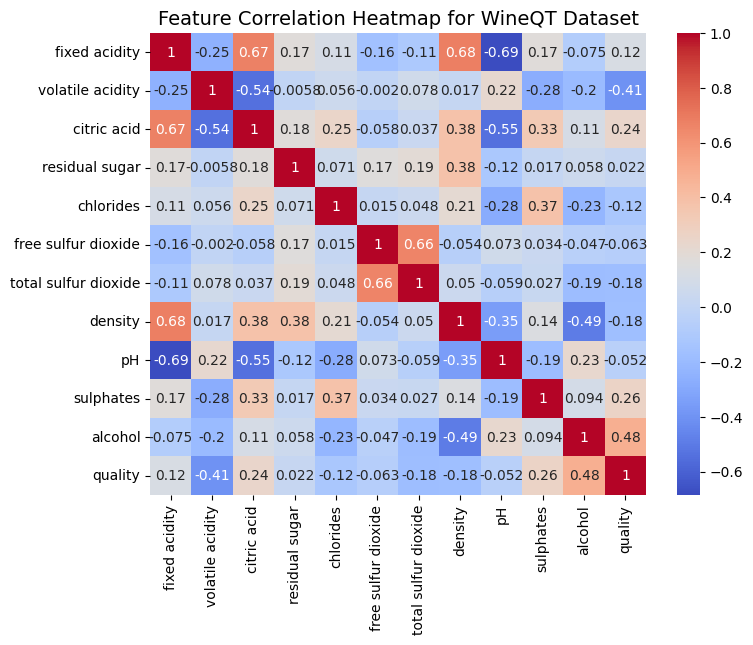

In [4]:

plt.figure(figsize=(8,6))
sns.heatmap(data.iloc[:, :-1].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap for WineQT Dataset", fontsize=14)
plt.show()

As we can see in the Heatmap, the top 3 chemical attributes that have the greates impact on wine quality are alcohol, sulphates, and citric acid.

# 1.2: We will select 4 attributes of our choice with a mean of those four attributes and use a bar plot to display it

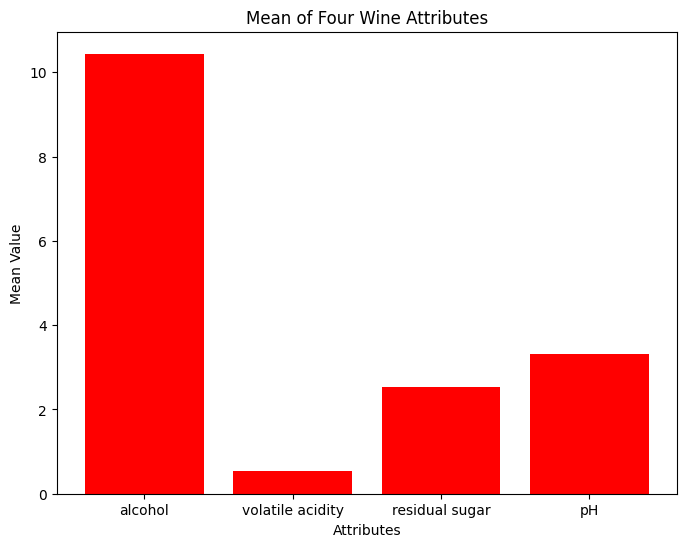

<Figure size 640x480 with 0 Axes>

In [42]:
attributes = ["alcohol", "volatile acidity", "residual sugar", "pH"]
means = data[attributes].mean()
plt.figure(figsize=(8,6))
plt.bar(attributes, means, color ='red')
plt.title("Mean of Four Wine Attributes")
plt.xlabel("Attributes")
plt.ylabel("Mean Value")
plt.show()
plt.savefig("bar_chart.jpg")

In the above bar chart, with the four attributes chosen (alcohol, volatile acidity, residual sugar, pH) we can see the mean value of each of these attributes in each wine. We can see that alcohol has the highest mean value out of the four and most likley the highest mean value out of every chemical attribute.

# 1.3: We will select another 4 attributes with a correlation to the quality of win and display it using a line chart

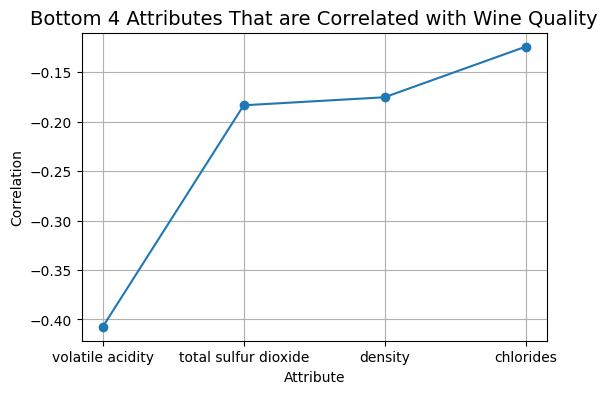

<Figure size 640x480 with 0 Axes>

In [41]:
# Correlation of each feature with quality
corr_with_quality = data.corr()['quality'].sort_values()

# Get the 4 attributes with the weakest (most negative) correlation
bottom4 = corr_with_quality.drop('quality').head(4)

plt.figure(figsize=(6,4))
plt.plot(bottom4.index, bottom4.values, marker='o') 
plt.title("Bottom 4 Attributes That are Correlated with Wine Quality", fontsize=14)
plt.xlabel("Attribute")
plt.ylabel("Correlation")
plt.grid(True)
plt.show()
plt.savefig("line_chart.jpg")

In the chart above, we chose 4 more attributes to use and this time we chose volatile acidity, total sulfur dixide, density, and chlorides. This line chart shows these four attributes and their respective correlation to the quality of wine. Out of those four attributes, we can see that volatile acidity have the biggest correlation to the quality of wine. 

# K-Means

In this section, I will be classifying the wines into different price categories based on their chemical attributes by using K-Means

In [29]:
# Get all the columns except the quality column
X = data.drop("quality", axis=1)

# Scale it all
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans on all the scaled features
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)          
centroids_scaled = kmeans.cluster_centers_     


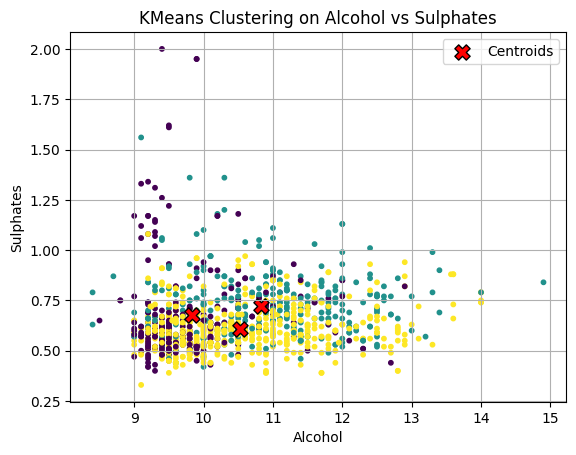

<Figure size 640x480 with 0 Axes>

In [40]:
# select two attributes that we want to see and convert them to centroids
x_feat = "alcohol"
y_feat = "sulphates"
ix_x = X.columns.get_loc(x_feat)
ix_y = X.columns.get_loc(y_feat)
centroids_orig = scaler.inverse_transform(centroids_scaled)
cent_x = centroids_orig[:, ix_x]
cent_y = centroids_orig[:, ix_y]

# scatter of actual wines, colored by K-means labels
plt.scatter(X[x_feat], X[y_feat],c=labels, s=10, cmap='viridis')

# centroids on same axes
plt.scatter(cent_x, cent_y, c='red', s=120, marker='X', edgecolor='black', label='Centroids')

# plot the scatter plot 
plt.title('KMeans Clustering on Alcohol vs Sulphates')
plt.xlabel(x_feat.capitalize())
plt.ylabel(y_feat.capitalize())
plt.legend()
plt.grid(True)
plt.show()
plt.savefig("K-Means.jpg")

The scatter plot above visualizes the clustering from applying K-Means to all the attributes in the wine dataset, but as we can see, we only selected alcohol vs sulphates to demonstrate the possible different price categories we could have. Based on the clustering and the groups, we can safely say that we can split the wines into 3 different price categories based on the K-Means clustering of the dataset, and the visual representation by alcohol vs sulphates

# K-NN

# In this section, we will finding the optimal value of k (number of neighbors) for predicting wine quality as accuratley as possible

In [34]:
# get all columns exepct quality
X = data.drop("quality", axis=1)
y = data["quality"]

# scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
# test a number of k values to find a good one
k_values = range(1, 31)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5)
    cv_scores.append(scores.mean())

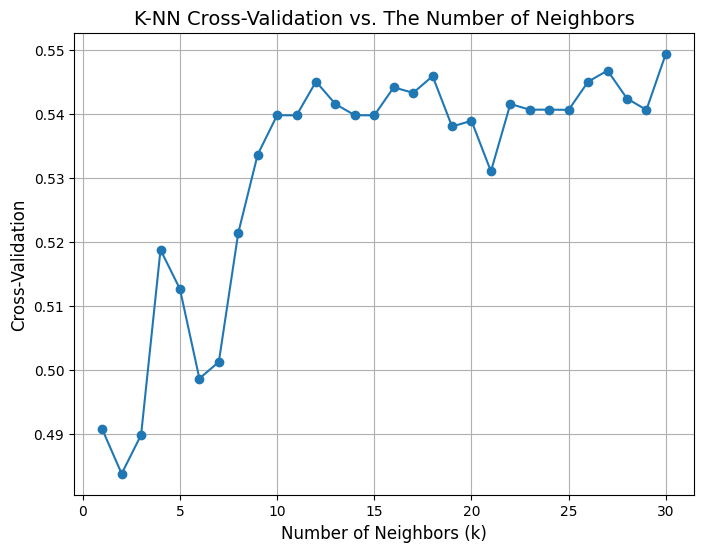

<Figure size 640x480 with 0 Axes>

In [39]:
# Plot the Figure
plt.figure(figsize=(8,6))
plt.plot(k_values, cv_scores, marker='o')
plt.title("K-NN Cross-Validation vs. The Number of Neighbors", fontsize=14)
plt.xlabel("Number of Neighbors (k)", fontsize=12)
plt.ylabel("Cross-Validation", fontsize=12)
plt.grid(True)
plt.show()
plt.savefig("K-NN.jpg")

In [38]:
# get the best k value
best_k = k_values[np.argmax(cv_scores)]
best_score = max(cv_scores)

best_k, best_score

(30, np.float64(0.5493832835363518))

The above figure shows the K-NN cross-validation compared to the number of neighbors found. This figure displays which k values is the most optimal for predicting the quality of the wine. And based on the figure we can see that the k value 30, is the most optimal for for predicting wine quality accurately.